In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
df = pd.read_csv('/mnt/Dev/STUDY/dima_sisan_ebaniy/Lab4/Lab4/Final_Pump_Norm/argF1_Norm.txt',header = None, sep='  ')

/tmp/ipykernel_32640/325788935.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('/mnt/Dev/STUDY/dima_sisan_ebaniy/Lab4/Lab4/Final_Pump_Norm/argF1_Norm.txt',header = None, sep='  ')


In [12]:
values = []
for i in range(df.shape[0]):
    value = df.iloc[i,1]
    values.extend([value]*20)

In [13]:
len(values)

10020

In [15]:
len(list(range(10020)))

10020

In [27]:
Y_df = pd.read_csv('/mnt/Dev/STUDY/dima_sisan_ebaniy/Lab4/Lab4/Final_Pump_Norm/Func_Norm.txt',header = None,sep='  ')

/tmp/ipykernel_32640/1497766023.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Y_df = pd.read_csv('/mnt/Dev/STUDY/dima_sisan_ebaniy/Lab4/Lab4/Final_Pump_Norm/Func_Norm.txt',header = None,sep='  ')


In [17]:
df_1000_sec = pd.DataFrame({'time':list(range(10020)), 'values':values})

In [148]:
train_data = df.iloc[:400,1].to_list()
test_data = df.iloc[400:,1].to_list()


In [149]:
len(train_data)

400

In [161]:
import itertools
import numpy as np
coefs = itertools.product(list(range(7)),list(range(7)),list(range(7)))

In [162]:
best_coefs = None
min_loss = float('inf')
for i,j,k in coefs:
    model = sm.tsa.ARIMA(train_data, order=(i, j, k))
    results = model.fit()
    predictions = results.predict(start=400, end=500)
    y_test = np.array(test_data)
    MSE = ((y_test-predictions)**2).sum()
    if min_loss > MSE:
        min_loss = MSE
        best_coefs = [i,j,k]

/mnt/Dev/anaconda3/envs/sisan/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/mnt/Dev/anaconda3/envs/sisan/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mnt/Dev/anaconda3/envs/sisan/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mnt/Dev/anaconda3/envs/sisan/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mnt/Dev/anaconda3/envs/sisan/l

KeyboardInterrupt: 

In [158]:
best_coefs

[3, 5]

/mnt/Dev/anaconda3/envs/sisan/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


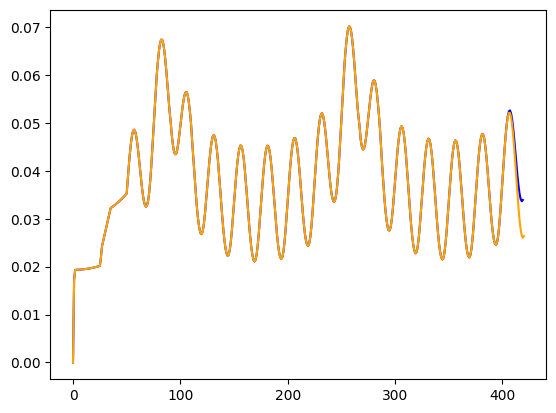

In [165]:
model = sm.tsa.ARIMA(train_data, order=(3, 0, 5))
results = model.fit()
predictions = results.predict(start=400, end=420)

plt.plot(train_data + test_data[:20],color='blue')
plt.plot(train_data + list(predictions),color='orange')


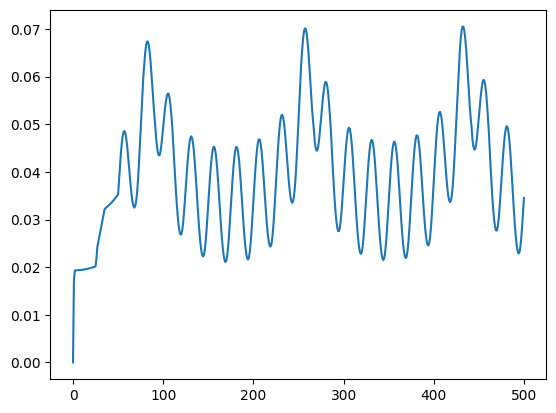

In [24]:
plt.plot(df.iloc[:,1])

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df_y = pd.read_csv('Final_Pump_Warn/Func_Warn.txt', header = None, sep = '  ')
df_X1 = pd.read_csv('Final_Pump_Warn/argF1_Warn.txt', header = None, sep = '  ')


/tmp/ipykernel_8353/1297545147.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_y = pd.read_csv('Final_Pump_Warn/Func_Warn.txt', header = None, sep = '  ')
/tmp/ipykernel_8353/1297545147.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_X1 = pd.read_csv('Final_Pump_Warn/argF1_Warn.txt', header = None, sep = '  ')


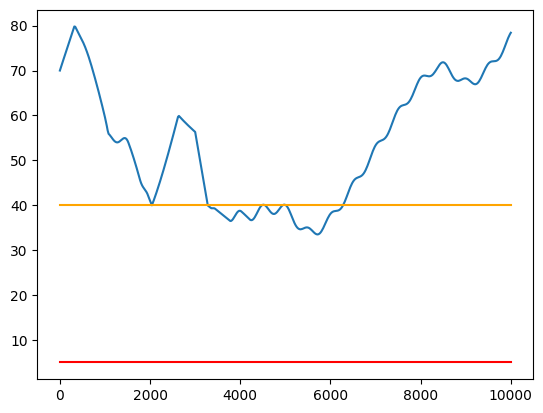

In [8]:
plt.plot(df_y.iloc[:,0] ,df_y.iloc[:,1])
plt.plot(df_y.iloc[:,0],[5 for i in range(df_y.iloc[:,1].shape[0])],color='red')
plt.plot(df_y.iloc[:,0],[40 for i in range(df_y.iloc[:,1].shape[0])],color='orange')


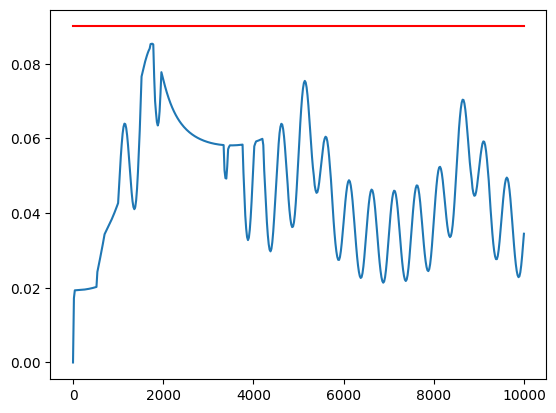

In [19]:
plt.plot(df_y.iloc[:,0] ,df_X1.iloc[:,1])
plt.plot(df_y.iloc[:,0],[0.09 for i in range(df_y.iloc[:,1].shape[0])],color='red')



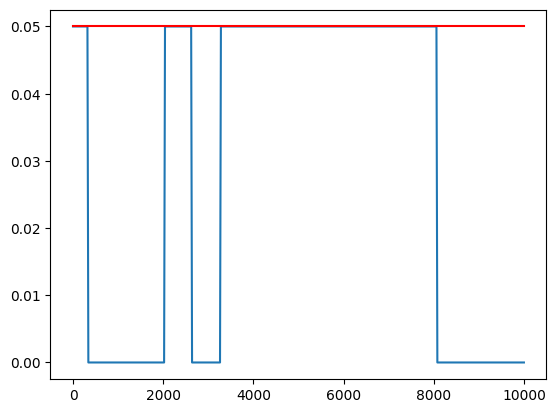

In [20]:
plt.plot(df_y.iloc[:,0] ,df_X1.iloc[:,2])
plt.plot(df_y.iloc[:,0],[0.05 for i in range(df_y.iloc[:,1].shape[0])],color='red')



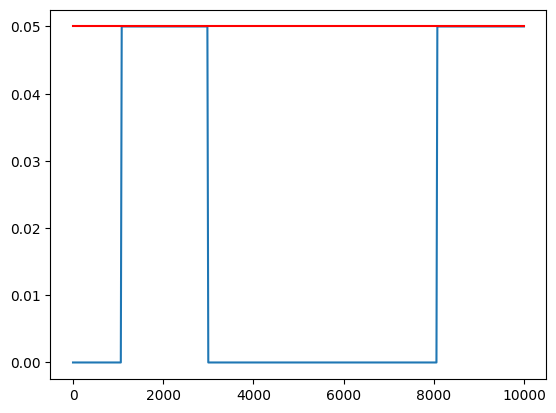

In [21]:
plt.plot(df_y.iloc[:,0] ,df_X1.iloc[:,3])
plt.plot(df_y.iloc[:,0],[0.05 for i in range(df_y.iloc[:,1].shape[0])],color='red')



In [12]:
df_y.iloc[:,0][(df_y.iloc[:,1] < 40)]

102    2040.0
164    3280.0
165    3300.0
166    3320.0
167    3340.0
        ...  
309    6180.0
310    6200.0
311    6220.0
312    6240.0
313    6260.0
Name: 0, Length: 143, dtype: float64

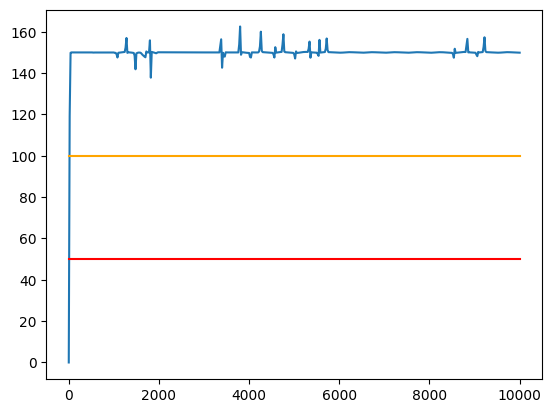

In [13]:
plt.plot(df_y.iloc[:,0] ,df_y.iloc[:,2])
plt.plot(df_y.iloc[:,0],[50 for i in range(df_y.iloc[:,1].shape[0])],color='red')
plt.plot(df_y.iloc[:,0],[100 for i in range(df_y.iloc[:,1].shape[0])],color='orange')


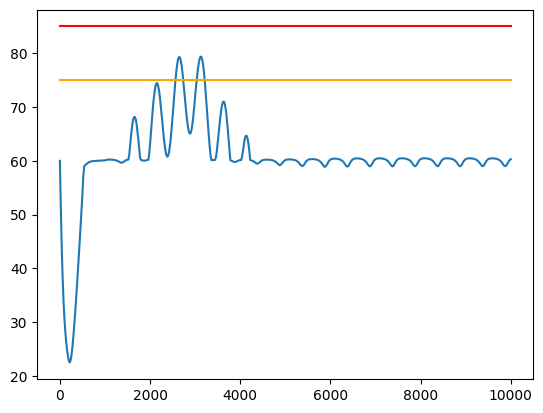

In [14]:
plt.plot(df_y.iloc[:,0] ,df_y.iloc[:,3])
plt.plot(df_y.iloc[:,0],[85 for i in range(df_y.iloc[:,1].shape[0])],color='red')
plt.plot(df_y.iloc[:,0],[75 for i in range(df_y.iloc[:,1].shape[0])],color='orange')


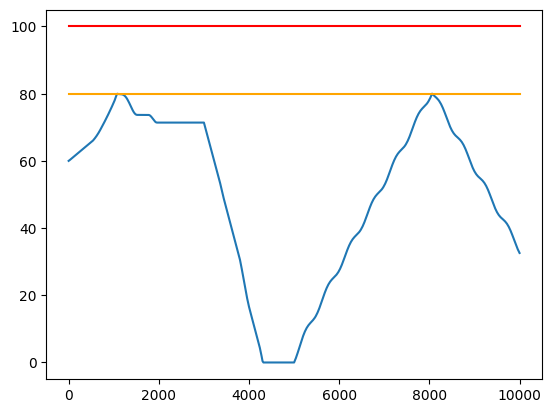

In [16]:
plt.plot(df_y.iloc[:,0] ,df_y.iloc[:,4])
plt.plot(df_y.iloc[:,0],[100 for i in range(df_y.iloc[:,1].shape[0])],color='red')
plt.plot(df_y.iloc[:,0],[80 for i in range(df_y.iloc[:,1].shape[0])],color='orange')
